In [1]:
#conda install -c anaconda nltk 
import string
import email
import nltk
from nltk.corpus import stopwords
punctuations = list(string.punctuation)
#ntlk.download()
#stopwords = ntlk.download('stopwords')
stopwords= set(nltk.corpus.stopwords.words('english'))

stemmer = nltk.PorterStemmer()

# Combine the different parts of the email into a flat list of strings
def flatten_to_string(parts):
    ret = []
    if type(parts) == str:
        ret.append(parts)
    elif type(parts) == list:
        for part in parts:
            ret += flatten_to_string(part)
    elif parts.get_content_type == 'text/plain':
        ret += parts.get_payload()
    return ret

# Extract subject and body text from a single email file
def extract_email_text(path):
    # Load a single email from an input file
    with open(path, errors='ignore') as f:
        msg = email.message_from_file(f)
    if not msg:
        return ""

    # Read the email subject
    subject = msg['Subject']
    if not subject:
        subject = ""

    # Read the email body
    body = ' '.join(m for m in flatten_to_string(msg.get_payload())
                    if type(m) == str)
    if not body:
        body = ""

    return subject + ' ' + body

# Process a single email file into stemmed tokens
def load(path):
    email_text = extract_email_text(path)
    if not email_text:
        return []

    # Tokenize the message
    tokens = nltk.word_tokenize(email_text)

    # Remove punctuation from tokens
    tokens = [i.strip("".join(punctuations)) for i in tokens
              if i not in punctuations]

    # Remove stopwords and stem tokens
    if len(tokens) > 2:
        return [stemmer.stem(w) for w in tokens if w not in stopwords]
    return []

In [2]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [5]:
import os
from nltk.tokenize import sent_tokenize, word_tokenize

DATA_DIR = '/Users/krithikaramachandran/Downloads/trec07p/data/'
LABELS_FILE = '/Users/krithikaramachandran/Downloads/trec07p/full/index'
TRAINING_SET_RATIO = 0.7

labels = {}
spam_words = set()
ham_words = set()

# Read the labels
with open(LABELS_FILE) as f:
    for line in f:
        line = line.strip()
        label, key = line.split()
        labels[key.split('/')[-1]] = 1 if label.lower() == 'ham' else 0
        

# Split corpus into training and test sets
filelist = os.listdir(DATA_DIR)
X_train = filelist[:int(len(filelist)*TRAINING_SET_RATIO)]
X_test = filelist[int(len(filelist)*TRAINING_SET_RATIO):]

for filename in X_train:
    path = os.path.join(DATA_DIR, filename)
    if filename in labels:
        label = labels[filename]
        stems = load(path)
        if not stems:
            continue
        if label == 1:
            ham_words.update(stems)
        elif label == 0:
            spam_words.update(stems)
        else:
            continue

blacklist = spam_words - ham_words


In [7]:
type(blacklist)

set

In [34]:
import pandas as pd
df_blacklist=pd.DataFrame(list(blacklist))

In [24]:
type(df_blacklist)

pandas.core.frame.DataFrame

In [38]:
df_blacklist.rename(columns={0:"blacklist"},inplace=True)

In [40]:
df_blacklist.head()

,blacklist
0,iflick-typ
1,haematopodida
2,"1,110"
3,siculu
4,avast


In [44]:
spam_words

{'',
 'iflick-typ',
 'haematopodida',
 'separ',
 '1,110',
 'avast',
 'siculu',
 'rainpixie.com/u/101d/producttestpanel',
 'ccedil',
 'ﵽ207ԫҳ˵൱ʹÿ귢һ',
 'sadleriana',
 'geocities.com/leightonwthg87',
 'o-us',
 'www.soft6.com/bbs/article/142671',
 'ʦһҵнϵѯưʵʹչʾ⡣',
 'rjti',
 'bpetg.tothinkthat.com',
 '01:41:50',
 'blank1_nam',
 'www.fastascend.com/i/6upkjj/g2c5kz9d/facar_8435/denim_1.jpg',
 'concorsuper.com/t/qc7de_2lp/668597',
 'www.dailylanebox.com/i/mdoxii/rdncou8g/gipix_6722/kudan_19.gif',
 '3ͨϰĳ',
 'oben',
 'kmzn.listedbythe.com',
 'vnd.uloempa.com/-software-for-mac-.php',
 'obox',
 'retorno',
 'name=upromis',
 'ofodzf14xs234',
 'www.imagehosting.com/out.php/i504099_eurc.png',
 'www.fileplanet.com/promotions/graw2/email1.htm',
 'oxford',
 'lanesdealerbiz.com/x/mjuxodm5ndk5|ma==|chjvzhvjdhrlc3rwyw5lbebzcgvlzhkudxdhdgvybg9vlmnh|mte5mzi5|ng==|njq2mq==|mtayoty=|njmxmg==.html',
 'reati',
 'ini',
 'ascendclick.com/x/ode5mjy5nju=|mze2mzk1|chjvzhvjdhrlc3rwyw5lbebzcgvlzhkudxdhdgvybg9vlmnh|ntmzot

In [41]:
!pip install wordcloud


     |████████████████████████████████| 163kB 533kB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


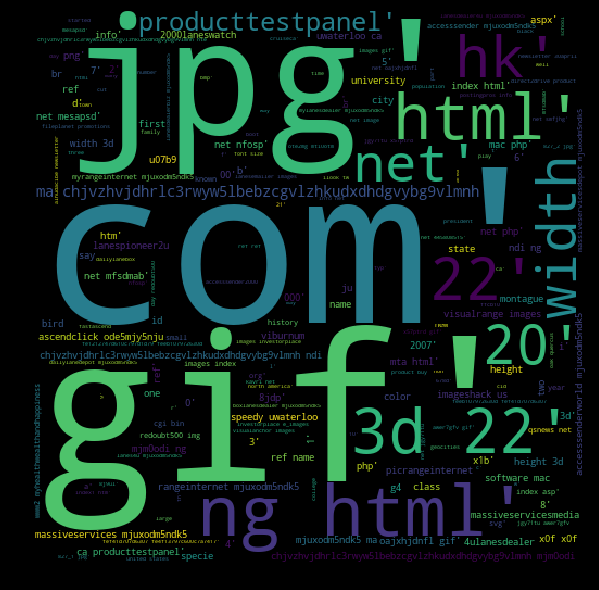

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
spam_wc=WordCloud(width=512,height=512).generate(str(spam_words))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

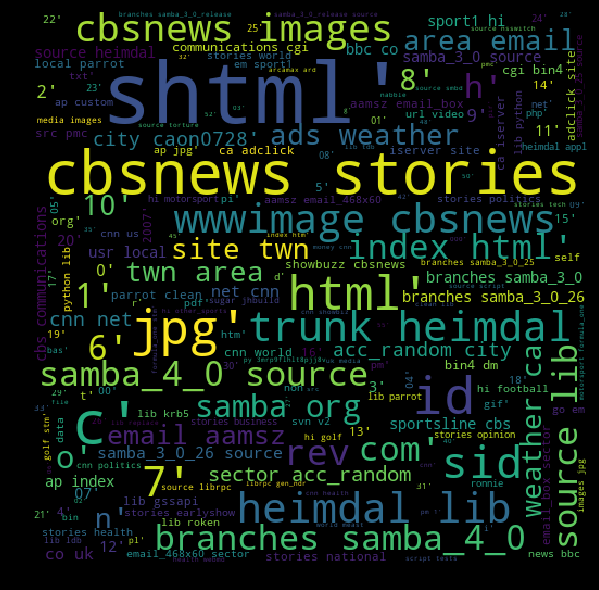

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
spam_wc=WordCloud(width=512,height=512).generate(str(ham_words))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [20]:
blacklist

{'iflick-typ',
 'haematopodida',
 '1,110',
 'siculu',
 'avast',
 'rainpixie.com/u/101d/producttestpanel',
 'ccedil',
 'ﵽ207ԫҳ˵൱ʹÿ귢һ',
 'sadleriana',
 'geocities.com/leightonwthg87',
 'o-us',
 'www.soft6.com/bbs/article/142671',
 'ʦһҵнϵѯưʵʹչʾ⡣',
 'rjti',
 'bpetg.tothinkthat.com',
 '01:41:50',
 'blank1_nam',
 'www.fastascend.com/i/6upkjj/g2c5kz9d/facar_8435/denim_1.jpg',
 'concorsuper.com/t/qc7de_2lp/668597',
 'www.dailylanebox.com/i/mdoxii/rdncou8g/gipix_6722/kudan_19.gif',
 '3ͨϰĳ',
 'kmzn.listedbythe.com',
 'vnd.uloempa.com/-software-for-mac-.php',
 'obox',
 'retorno',
 'name=upromis',
 'ofodzf14xs234',
 'www.imagehosting.com/out.php/i504099_eurc.png',
 'www.fileplanet.com/promotions/graw2/email1.htm',
 'lanesdealerbiz.com/x/mjuxodm5ndk5|ma==|chjvzhvjdhrlc3rwyw5lbebzcgvlzhkudxdhdgvybg9vlmnh|mte5mzi5|ng==|njq2mq==|mtayoty=|njmxmg==.html',
 'ascendclick.com/x/ode5mjy5nju=|mze2mzk1|chjvzhvjdhrlc3rwyw5lbebzcgvlzhkudxdhdgvybg9vlmnh|ntmzoty=|mta=|ma==|otg4mq==|ntkznw==.html',
 'en-ca',
 'www

In [50]:
#MinHash + LSH algorithm11 to perform string matching with sublinear query costs (with respect to the cardinality of the spam set). MinHash converts string token sets to short signatures while preserving qualities of the original input that enable similarity matching. LSH can then be applied on MinHash signatures instead of raw tokens, greatly improving performance. MinHash trades the performance gains for some loss in accuracy, so there will be some false positives and false negatives in your result.
from datasketch import MinHash, MinHashLSH

# Extract only spam files for inserting into the LSH matcher
spam_files = [x for x in X_train if labels[x] == 0]

# Initialize MinHashLSH matcher with a Jaccard
# threshold of 0.5 and 128 MinHash permutation functions
lsh = MinHashLSH(threshold=0.5, num_perm=128)

# Populate the LSH matcher with training spam MinHashes
for idx, f in enumerate(spam_files):
    minhash = MinHash(num_perm=128)
    stems = load(os.path.join(DATA_DIR, f))
    if len(stems) < 2: continue
    for s in stems:
        minhash.update(s.encode('utf-8'))
    lsh.insert(f, minhash)
    
def lsh_predict_label(stems):
    '''
    Queries the LSH matcher and returns:
        0 if predicted spam
        1 if predicted ham
       −1 if parsing error
    '''
    minhash = MinHash(num_perm=128)
    if len(stems) < 2:
        return -1
    for s in stems:
        minhash.update(s.encode('utf-8'))
    matches = lsh.query(minhash)
    if matches:
        return 0
    else:
        return 1

In [51]:
def read_email_files():
    X = []
    y = []
    for i in range(len(labels)):
        filename = 'inmail.' + str(i+1)
        email_str = extract_email_text(os.path.join(DATA_DIR, filename))
        X.append(email_str)
        y.append(labels[filename])
    return X, y

In [52]:
from sklearn.model_selection import train_test_split

X, y = read_email_files()

X_train, X_test, y_train, y_test, idx_train, idx_test = \
    train_test_split(X, y, range(len(y)),
    train_size=TRAINING_SET_RATIO, random_state=2)

/Users/krithikaramachandran/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [54]:
!pip install sklearn


  Stored in directory: /Users/krithikaramachandran/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
You should consider upgrading via the 'pip install --upgrade pip' command.


In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)

In [58]:
#Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initialize the classifier and make label predictions
mnb = MultinomialNB()
mnb.fit(X_train_vector, y_train)
y_pred = mnb.predict(X_test_vector)

# Print results
print('Accuracy {:.3f}'.format(accuracy_score(y_test, y_pred)))

Accuracy 0.974
